In [1]:
import pandas as pd
import numpy as np
from itertools import chain # to flatten a 2-D list
import math
import matplotlib.pyplot as plt
import seaborn as sns

# 3. EDA

Questions to answer:
1. What brands have the most number of products, reviews, and largest market? 
2. What is the metrics to measure popularity and which brands/products are most popular? 
3. What category have the largest market? and how to price the product? 
4. How to predict a product popularity? 

Bigger questions:
what products should sephora recommend to customers based on their interests, age, skintypes, budgets, and concerns? 

Challenge:

Most expensive vs most popular brands

Brands with the most expensive products are niche brands or spa brands (from personal knowledge) that have a median price between $100 and $215 and brands with the most expensive products by oz is between $155 and $580 per oz. Augustinus Bader, Dr Lara Devgan Scientific Beauty, La Mer are the among top brands that have the most expensive products and the highest price_per_oz products.

Brands with the most expensive products have a median price between $100 and $215 and brands with the most expensive products by oz is between $155 and $580 per oz. 

Using the metrics for popularity is the mean of love counts and number of reviews, brands with most popular products. 

We dont have sale data but we could use the number of reviews and the data on verified purchases as sale metric. 

The majority of the products costs between $10 and $100 with the cheaper products being more popular. 53% of the reviews were for products between $20-50, 23% for products between $50-100, and 12% for products between %20-50

What brands have the most market share? The most number of products? and the most number of reviews? 

The majority of the products costs between $10 and $100 and cheaper products receive more reviews and got higher ratings than more expensive products

Breaking reviews down by age groups: 
38% of the reviews were from the 25-34 age group, followed by 24% by the 18-24 age group, and 16% by the 35-44 age groups 
Among all the product price ranges, the $20-50 price category again received the highest reviews counts across all age group: 22% from 25-34, 14% from 18-24, and 9% from 37-44 age groups. 

Moisturizing-cream-oils-mists category received the most number of reviews across all age groups followed by cleanser category
If a start-up wants to introduce a few new products to the market, it is recommened that the products cost between \\$20-50, targeting customers from 18-34 yrs-old and in the cleanser/moisturizing categories

In [2]:
products = pd.read_csv('Cleaned_data/cleaned_all_products.csv', index_col = 0)
reviews = pd.read_csv('Cleaned_data/cleaned_all_reviews.csv', index_col = 0)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# rename 'rating' columns to avoid confusion
products = products.rename(columns = {'rating': 'product_rating'})
reviews = reviews.rename(columns = {'Rating': 'user_rating'})

In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184 entries, 0 to 2183
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            2184 non-null   object 
 1   product_name          2184 non-null   object 
 2   price                 2184 non-null   float64
 3   category              2184 non-null   object 
 4   loves_count           2184 non-null   int64  
 5   product_id            2184 non-null   object 
 6   no_reviews            2184 non-null   int64  
 7   product_rating        2184 non-null   float64
 8   short_description     2184 non-null   object 
 9   ingredients           2184 non-null   object 
 10  highlights            2184 non-null   object 
 11  unique_product_name   2184 non-null   object 
 12  Total_reviews         2184 non-null   float64
 13  RecommendedCount      2184 non-null   float64
 14  AverageOverallRating  2166 non-null   float64
 15  1star                

## 3.1 Brands with the most expensive products
Brands with the most expensive products are niche brands or spa brands (from personal knowledge) that have a median price between \\$100 and \\$215 and brands with the most expensive products by oz is between \\$155 and \\$580 per oz. 
Augustinus Bader, Dr Lara Devgan Scientific Beauty, La Mer are the among top brands that have the most expensive products and the highest price_per_oz products. 

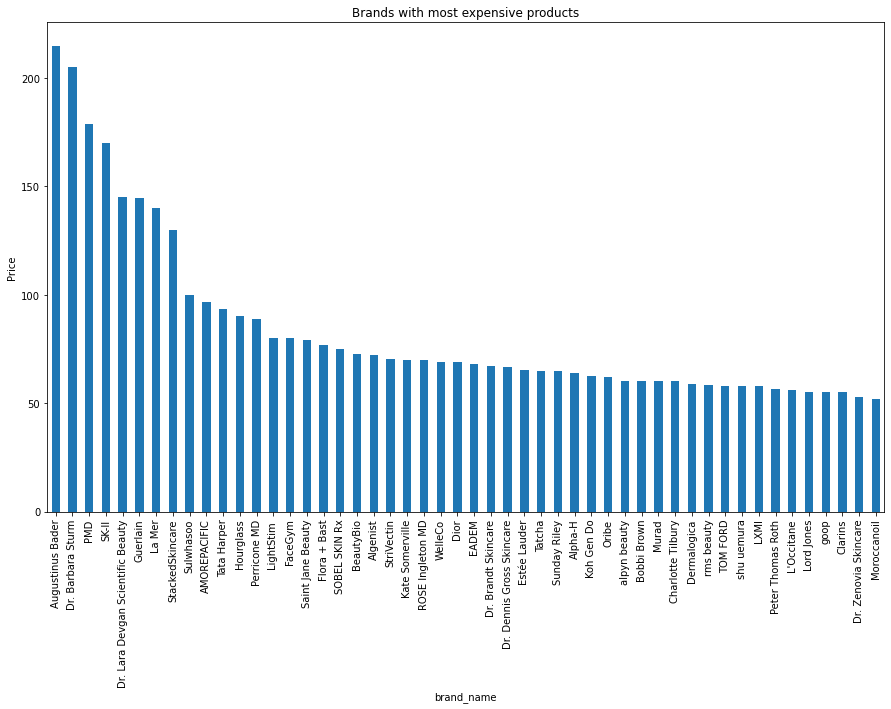

In [5]:
products.groupby('brand_name')['price'].median().sort_values(ascending = False).head(50).plot.bar(figsize = (15,9))
_ = plt.title('Brands with most expensive products')
_ = plt.ylabel('Price')

#### Top 10 brands with most expensive products:

In [6]:
(products.groupby('brand_name')['price'].agg(min_price = 'min', median_price = 'median', 
                                              max_price = 'max', mean_price = 'mean').sort_values(by = 'median_price', ascending = False).head(10))

,min_price,median_price,max_price,mean_price
brand_name,,,,
Augustinus Bader,65.0,215.0,375.0,218.000000
Dr. Barbara Sturm,55.0,205.0,360.0,189.787879
PMD,179.0,179.0,179.0,179.000000
SK-II,75.0,170.0,385.0,179.384615
Dr. Lara Devgan Scientific Beauty,50.0,145.0,245.0,144.000000
Guerlain,29.5,144.5,525.0,168.708333
La Mer,25.0,140.0,530.0,192.121212
StackedSkincare,28.0,130.0,150.0,102.666667
Sulwhasoo,40.0,100.0,240.0,128.083333


#### Top 10 brands with most expensive products by 'price_per_oz'

In [7]:
(products.groupby('brand_name')['price_per_oz'].agg(min_price = 'min', median_price = 'median', 
                                              max_price = 'max', mean_price = 'mean').sort_values(by = 'median_price', ascending = False).head(10))

,min_price,median_price,max_price,mean_price
brand_name,,,,
TOM FORD,580.000000,580.000000,580.000000,580.000000
Givenchy,171.428571,380.000000,411.111111,320.846561
PAT McGRATH LABS,316.666667,316.666667,316.666667,316.666667
Dr. Lara Devgan Scientific Beauty,32.500000,245.000000,500.000000,270.500000
Armani Beauty,36.363636,208.181818,380.000000,208.181818
Gucci,57.000000,203.500000,350.000000,203.500000
ILIA,0.000000,177.857143,200.000000,126.063305
Augustinus Bader,19.230769,170.000000,430.000000,230.022624
La Mer,0.000000,161.764706,570.000000,174.614924


## 3.2 Brands with the most popular products
The top 10 brands by total reviews all have at least 30k reviews and a median price between \\$20-50 (except 3 brands: tatcha \\$65, The Ordinary \\$8, and Sephora Collection \\$10)
Using the weighted rating as a metric for popularity revealed a similar pattern, that is brands with median product price between \\$20-50 are the more popular ones with better reviews. 

<ipython-input-31-c52ea108b1cc>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(brand_ranking[:50], rotation = 90)


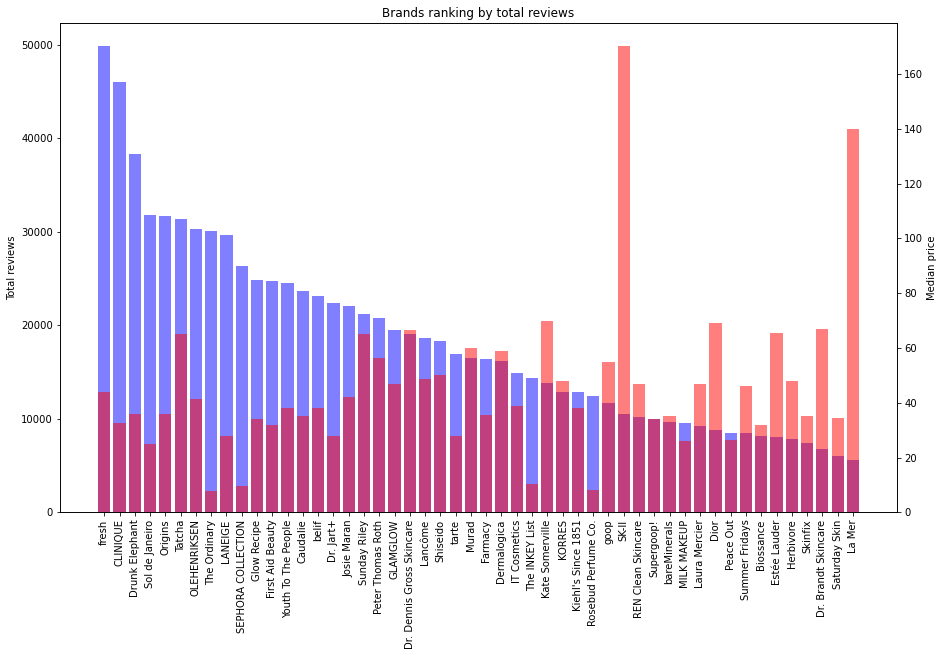

In [31]:
fig, ax = plt.subplots(figsize=(15, 9))
brand_ranking= (products.groupby('brand_name')['Total_reviews'].sum().sort_values(ascending = False).index)
total_reviews_ranking= (products.groupby('brand_name')['Total_reviews'].sum().sort_values(ascending = False))
price_ranking = (products.groupby('brand_name')[['Total_reviews', 'price']].agg(sum_reviews = ('Total_reviews', 'sum'), 
                                                                                med_price = ('price','median')).sort_values(by = 'sum_reviews',ascending = False)['med_price'])

_ = ax.bar(brand_ranking[:50], total_reviews_ranking[:50], color = 'b', alpha  = .5)
_ = ax2 = ax.twinx()
_ = ax2.bar(brand_ranking[:50], price_ranking[:50], color = 'r', alpha  = .5)
_ = plt.title('Brands ranking by total reviews')
_ = ax.set_ylabel('Total reviews')
_ = ax2.set_ylabel('Median price')
_ = ax.set_xticklabels(brand_ranking[:50], rotation = 90)

### Defining metrics for popularity:

Are the most popular products the ones with the most number of reviews or the ones with highest average ratings? Let's have a look at how they correlate: 

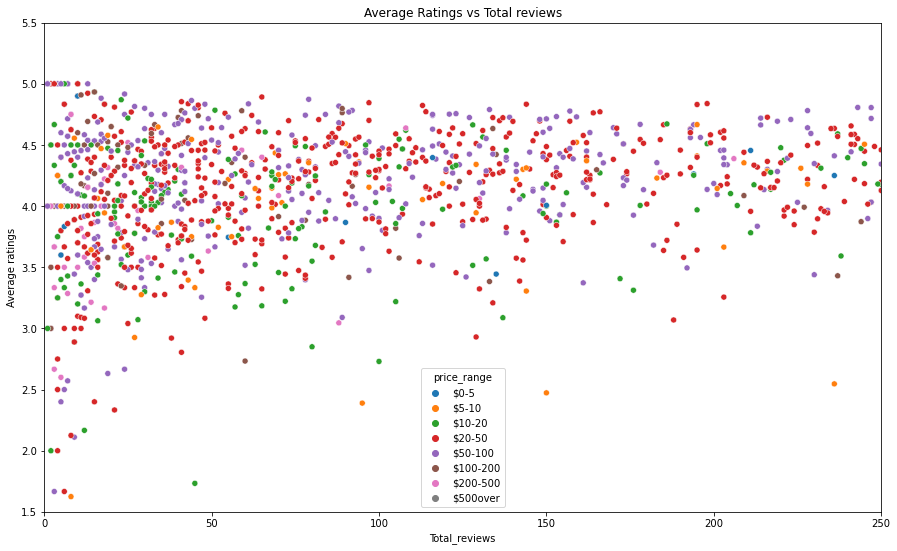

In [45]:
fig, ax = plt.subplots(figsize=(15, 9))
_ = sns.scatterplot(x = 'Total_reviews', y = 'AverageOverallRating', data = products, hue = 'price_range')
_ = plt.axis([0, 250, 1.5, 5.5])
_ = plt.title('Average Ratings vs Total reviews')
_ = plt.ylabel('Average ratings')

There are many products with just a few reviews that have very high or almost perfect rating scores. As the number of reviews increases, the rating of a product regularizes and approaches towards a value that is reflective of the product's quality and gives the customer a much better idea as to which product he/she should choose. To account for this siatuation, I used a weighted rating that takes into account the average rating and the number of ratings that a product has received. 

We are going to use this metric that is recommened by datacamp (which was how the IMDB Top 250 movies were suggested):
WeightedRating(WR)=(v/(v+m)⋅R)+(m/(v+m)⋅C)

in which: 
v is the number of votes for the movie;
m is the minimum votes required to be listed in the chart;
R is the average rating of the movie;
C is the mean vote across the whole report.

This weighted rating assures that a product with an average rating of 4 from 10,000 reviewers gets a (far) higher score than a product with the same rating but only a few hundred reviews.

To get the list of the top 100 most popular products, I chose the 85th percentile as the value for m. In other words, for a products in the top 50, it must have at least more ratings that 85% of the products on the platform.  

In [21]:
print(products.Total_reviews.quantile([.8, .85, .9, .95, .99]))
# at least 20% of the products received more than 674 reviews, we could use this as a cut-off 
no_reviews_cutoff = products.Total_reviews.quantile(.85)
mean_reviews = products.Total_reviews.mean()

0.80     674.40
0.85     922.95
0.90    1311.80
0.95    1968.10
0.99    4332.42
Name: Total_reviews, dtype: float64


In [22]:
def compute_weighted_rating(data, m = no_reviews_cutoff, C = mean_reviews):
    """ 
    this function computes the weighted rating from the actual rating and the number of reviews 
    """
    v = data['Total_reviews']
    R = data['AverageOverallRating']
    return (v/(v + m)*R)+(m/(v+m)*C)

In [28]:
# filter out all qualified products:
top_products = products[products['Total_reviews'] >= no_reviews_cutoff].copy()
top_products['popularity'] = compute_weighted_rating(top_products)

In [26]:
#Print the top 10 products with the highest weighted rating score: 
(top_products[['product_name', 'brand_name','price', 
               'category', 'weighted_rating',
               'Total_reviews', 'AverageOverallRating']].sort_values(by = 'popularity', 
                                                                     ascending=False).head(10))

,product_name,brand_name,price,category,weighted_rating,Total_reviews,AverageOverallRating
1113,Rose Deep Hydration Oil-Infused Serum,fresh,59.0,facial treatments,245.261246,927.0,4.5955
978,Ceramic Slip French Green Clay Cleanser,Sunday Riley,35.0,cleanser,244.756504,928.0,3.8481
1921,The Body Wash - With Niacinamide,Nécessaire,25.0,vegan skin care,244.589372,932.0,4.5494
203,Rose Floral Toner,fresh,40.0,moisturizing cream oils mists,244.495832,931.0,4.1053
129,Ultra Repair Face Moisturizer,First Aid Beauty,28.0,moisturizing cream oils mists,243.262994,941.0,4.2179
966,Blueberry Bounce Gentle Cleanser,Glow Recipe,34.0,cleanser,243.067671,941.0,3.8310
1101,Banana Bright 15% Vitamin C Serum,OLEHENRIKSEN,68.0,facial treatments,242.921317,943.0,4.0488
46,Glow Lip Pop Lip Balm,Glow Recipe,22.0,lip balm lip care,242.080058,952.0,4.6502
152,C.E.O. Vitamin C Brightening Rich Hydration Mo...,Sunday Riley,65.0,moisturizing cream oils mists,241.888515,951.0,4.0231
313,Midnight Recovery Concentrate Moisturizing Fac...,Kiehl's Since 1851,52.0,moisturizing cream oils mists,241.861930,952.0,4.2206


<ipython-input-30-3014b495a0de>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(brand_ranking[:50], rotation = 90)


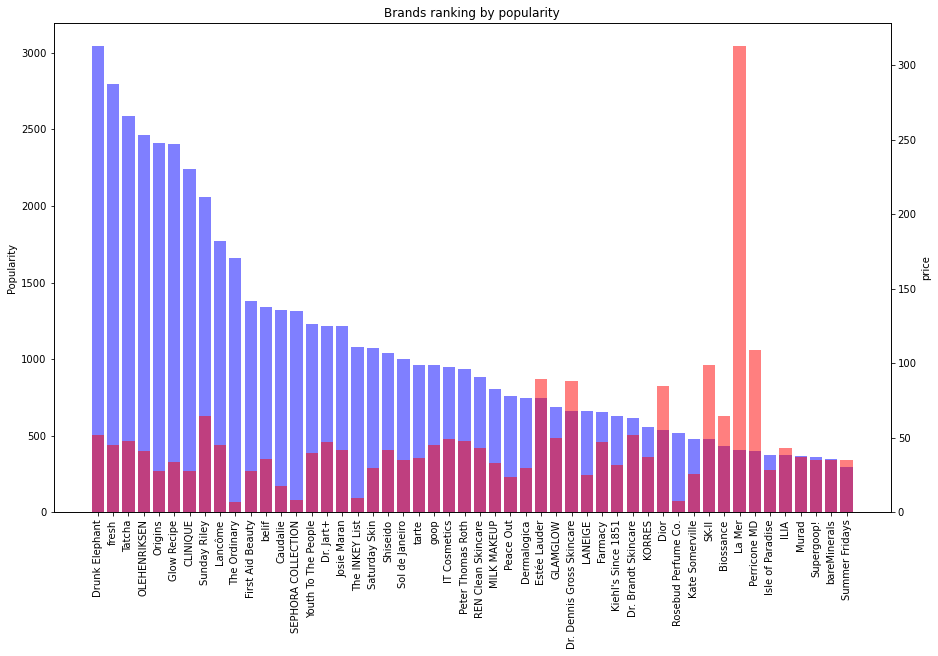

In [30]:
fig, ax = plt.subplots(figsize=(15, 9))
brand_ranking= (top_products.groupby('brand_name')['popularity'].sum().sort_values(ascending = False).index)
price_ranking = (top_products.groupby('brand_name')[['popularity', 'price']].agg(total_pop = ('popularity', 'sum'), 
                                                                             med_price = ('price','median')).sort_values(by = 'total_pop',ascending = False)['med_price'])
popularity_ranking = (top_products.groupby('brand_name')['popularity'].sum().sort_values(ascending = False))

_ = ax.bar(brand_ranking[:50], popularity_ranking[:50], color = 'b', alpha  = .5)
_ = ax2 = ax.twinx()
_ = ax2.bar(brand_ranking[:50], price_ranking[:50], color = 'r', alpha  = .5)
_ = plt.title('Brands ranking by popularity')
_ = ax.set_ylabel('Popularity')
_ = ax2.set_ylabel('Median price')
_ = ax.set_xticklabels(brand_ranking[:50], rotation = 90)

## 3.3 Price
The majority of the products cost between \\$20-100 with a median price of \\$40. The price distribution is heavily left skewed. 

For products cost less than \\$40, there is a weak positive correlation between the number of reviews and the price. However, for product costing more than $40, the correlation becomes weakly positive. Among the cheaper products, there is a "the more expensive, the better" product perception. However, when the product becomes too expensive, it prevents customers from purchasing it. 

In [12]:
# create price category:
products['price_range'] = (pd.cut(products['price'], bins = [0, 5, 10, 20, 50, 100, 200, 500, np.inf], 
                                 labels = ['$0-5', '$5-10', '$10-20', '$20-50', '$50-100', '$100-200', '$200-500', '$500over']))

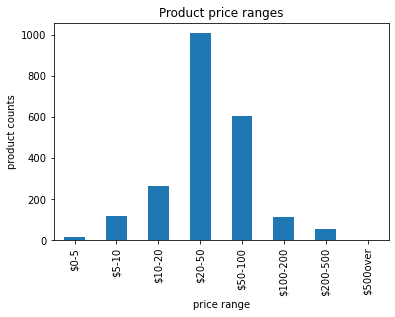

In [32]:
_ = products.price_range.value_counts(ascending=True).sort_index().plot.bar()
_ = plt.title('Product price ranges')
_ = plt.xlabel('price range')
_ = plt.ylabel('product counts')

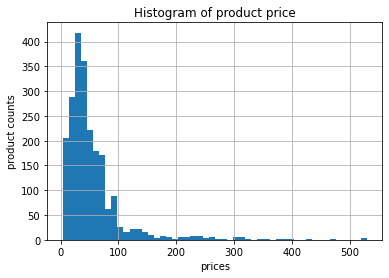

In [34]:
_ = products.price.hist(bins = 50)
_ = plt.title('Histogram of product price')
_ = plt.xlabel('prices')
_ = plt.ylabel('product counts')

In [35]:
products.price.describe()

count    2184.000000
mean       53.349712
std        52.247134
min         3.500000
25%        25.000000
50%        39.000000
75%        65.000000
max       530.000000
Name: price, dtype: float64

In [44]:
products[(products['price']<=100) & (products['price']>=40)][['Total_reviews', 'price']].corr()

,Total_reviews,price
Total_reviews,1.000000,-0.102201
price,-0.102201,1.000000


### 3.4 Total reviews grouped by age groups and price range
38% of the reviews were from the 25-34 age group, followed by 24% by the 18-24 age group, and 16% by the 35-44 age groups. Among all the product price ranges, the $20-50 price category again received the highest reviews counts across all age group: 22% from 25-34, 14% from 18-24, and 9% from 37-44 age groups. 

The total reviews distribution is heavily left skewed with a mean of 487 while 50% of the products received less than 164 reviews

In [47]:
total_reviews_by_agegroups = products[['13to17', '18to24', '25to34', '35to44', '45to54', 'over54']].sum().sum()
(products.groupby('price_range')[['13to17', '18to24', '25to34', '35to44', '45to54', 'over54', 'Total_reviews']].sum()/total_reviews_by_agegroups*100)

,13to17,18to24,25to34,35to44,45to54,over54,Total_reviews
price_range,,,,,,,
$0-5,0.006862,0.023037,0.049506,0.018136,0.004902,0.024998,1.018548
$5-10,0.528390,2.191005,3.027214,1.238138,0.557799,0.771508,37.014254
$10-20,0.691122,3.703141,5.735825,2.588032,1.372441,1.525371,63.663144
$20-50,2.522351,14.027821,21.857109,8.946847,4.524645,5.147145,278.937436
$50-100,0.585738,3.137499,6.143146,2.979178,1.438613,1.813583,118.152498
$100-200,0.098032,0.470061,0.972963,0.487707,0.221551,0.234786,19.577386
$200-500,0.011764,0.038722,0.080876,0.043134,0.017156,0.029900,1.953768
$500over,0.002941,0.019116,0.045585,0.020587,0.010783,0.013234,1.000412


In [48]:
products[['13to17', '18to24', '25to34', '35to44', '45to54', 'over54']].sum()/total_reviews_by_agegroups

13to17    0.044472
18to24    0.236104
25to34    0.379122
35to44    0.163218
45to54    0.081479
over54    0.095605
dtype: float64

In [49]:
(products.groupby('price_range')[['Total_reviews']].sum()/(products['Total_reviews'].sum()))

,Total_reviews
price_range,
$0-5,0.001954
$5-10,0.071001
$10-20,0.122120
$20-50,0.535063
$50-100,0.226642
$100-200,0.037554
$200-500,0.003748
$500over,0.001919


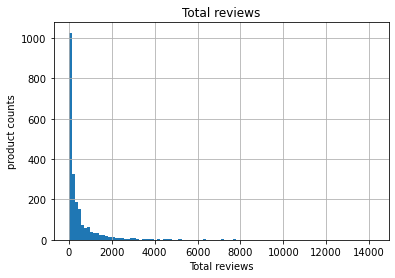

In [50]:
_ = products.Total_reviews.hist(bins = 100)
_ = plt.title('Total reviews')
_ = plt.xlabel('Total reviews')
_ = plt.ylabel('product counts')

In [51]:
products.Total_reviews.describe()

count     2184.000000
mean       486.983059
std        922.814092
min          0.000000
25%         41.000000
50%        161.000000
75%        510.500000
max      14196.000000
Name: Total_reviews, dtype: float64

## 3.5 Which category received the most attention?
Moisturizing-cream-oils-mists category received the most number of reviews across all age groups followed by cleanser category
If a start-up wants to introduce a few new products to the market, it is recommened that the products cost between \\$20-50, targeting customers from 18-34 yrs-old and in the cleanser/moisturizing categories

In [52]:
products.groupby('category')[['price', 'Total_reviews']].agg(median_price = ('price', 'median'), 
                                                            total_reviews = ('Total_reviews', 'sum')).sort_values(by = 'median_price', ascending = False)

,median_price,total_reviews
category,,
facial treatments,58.0,175103.0
eye treatment dark circle treatment,55.0,62034.0
moisturizing cream oils mists,51.0,325401.0
face mask,39.0,51537.0
sunscreen sun protection,35.0,42793.0
vegan skin care,32.0,125935.0
cleanser,30.0,182750.0
lip balm lip care,22.0,98018.0


In [53]:
total_reviews_by_agegroups = products[['13to17', '18to24', '25to34', '35to44', '45to54', 'over54']].sum().sum()
(products.groupby('category')[['13to17', '18to24', '25to34', '35to44', '45to54', 'over54']].sum()/total_reviews_by_agegroups*100)

,13to17,18to24,25to34,35to44,45to54,over54
category,,,,,,
cleanser,0.908752,5.873559,9.016940,3.756568,2.057192,2.056211
eye treatment dark circle treatment,0.190181,1.055309,1.947396,0.892087,0.476923,0.523488
face mask,0.153419,0.500941,0.828366,0.323994,0.112246,0.293114
facial treatments,0.558780,2.788507,4.708454,2.093463,0.873461,1.213140
lip balm lip care,0.834738,3.666379,5.566720,2.439515,1.303329,1.300388
moisturizing cream oils mists,1.214611,6.685750,10.858952,4.616795,2.245412,2.770861
sunscreen sun protection,0.209297,1.114128,1.729766,0.710729,0.364187,0.341150
vegan skin care,0.377421,1.925829,3.255627,1.488609,0.715140,1.062172


## 3.5 Ratings
There is a weak positive correlation between product price and rating suggesting that more expensive products tend to receive better reviews (does this make sense??? normally ppl are more critical toward expensive products?? or more expensive products are just better?)


In [58]:
products[['product_rating', 'price', 'Total_reviews']].corr()

,product_rating,price,Total_reviews
product_rating,1.000000,0.092067,0.141346
price,0.092067,1.000000,-0.088431
Total_reviews,0.141346,-0.088431,1.000000


## 3.6 Can we predict a product's popularity?

In [ ]:
# drop unused columns 
cleaned_products = (products.drop(columns = ['product_name', 'quick_look_description', 'url', 'sku', 
                                             'quick_sale_description', 'no_reviews', 'short_description',
                                             'long_description', 'usage', 'ingredients', 'highlights', 'special_category',
                                             'unique_product_name', '1star', '2star', '3star', '4star', '5star',
                                             'normal', 'combination', 'dry', 'oily', 'acneConcern', 'agingConcern', 
                                             'blackheadsConcern', 'dullnessConcern', 'rednessConcern', 'sensitivityConcern', 
                                             'stretchmarksConcern', 'celluliteConcern', 'darkCirclesConcern', 'sunDamageConcern', 
                                             'callusesConcern', 'cuticlesConcern', 'poresConcern', 'unevenSkinTonesConcern',
                                             'nonStaffReviews', 'staffReviews', 'incentivizedReviews', '13to17', 
                                             '18to24', '25to34', '35to44', '45to54', 'over54', 'price_range', 
                                             'loves_count', 'Total_reviews', 'size_oz', 'price_per_oz']))

In [ ]:
products.short_description

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(cleaned_products.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.plot()

In [ ]:
cleaned_products.corr()

## 3.7 Reviews

In [ ]:
#reviews[['isSephoraStaff', 'isVerifiedPurchase', 'isIncentivizedReview']] = reviews[['isSephoraStaff', 'isVerifiedPurchase', 'isIncentivizedReview']].astype(int)
cleaned_reviews= reviews.merge(cleaned_products, right_on = 'product_id', how = 'left', left_on = 'p_id')
# drop unused columns 
cleaned_reviews = cleaned_reviews.drop(columns = ['UserNickname', 'ReviewText', 'p_id'])

In [ ]:
#cleaned_reviews.groupby('author_id')[['product_id']].sort_values(ascending = False).head(50)